In [1]:
run_gridsearch = True
skip_best_model_validation = False
skip_best_model_test = False
verbose = False
GPU_SETTING = -1
NUM_ENSEMBLES = 5
RUNS_FILE = "guerneville_daily_stored_runs.json"
hyperparam_csv_file = "guerneville_daily_hyperparams.csv"

In [2]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 120],
    "num_layers": [1],
    "epochs": [16, 32, 48],
    "batch_size": [64, 128, 256],
    "schedule_pairs": [
        ((0.5, 0.25), (0.01, 0.005, 0.001))
    ]
}

In [3]:
import sys
import os
import itertools
import json
from pathlib import Path
from tqdm import tqdm
import warnings
from datetime import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all


In [ ]:
current_dir = os.getcwd()
print(current_dir)

In [4]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\python313.zip', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\DLLs', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\Lib', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project', '', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\Lib\\site-packages', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\Lib\\site-packages\\win32', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\arman\\anaconda3\\envs\\ucb-usace-project\\Lib\\site-packages\\Pythonwin']


In [ ]:
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import (combinedPlot, fancyCombinedPlot, combinedPlotFromDf, fancyCombinedPlotFromDf, fractional_multi_lr, write_paths, to_path_or_list, extended_combined_plot, extended_combined_plot_from_df)

In [6]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'guerneville_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("guerneville")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all
Train Basin File Exists: True


In [7]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("guerneville_gage_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Guerneville_daily_shift.csv")

In [8]:
features_with_physics = [
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    "Guerneville Gage FLOW",
    "Big Sulphur Cr ET-POTENTIAL",
    "Big Sulphur Cr FLOW",
    "Big Sulphur Cr FLOW-BASE",
    "Big Sulphur Cr INFILTRATION",
    "Big Sulphur Cr PERC-SOIL",
    "Big Sulphur Cr SATURATION FRACTION",
    "Dry Creek 10 ET-POTENTIAL",
    "Dry Creek 10 FLOW",
    "Dry Creek 10 FLOW-BASE",
    "Dry Creek 10 INFILTRATION",
    "Dry Creek 10 PERC-SOIL",
    "Dry Creek 10 SATURATION FRACTION",
    "Green Valley ET-POTENTIAL",
    "Green Valley FLOW",
    "Green Valley FLOW-BASE",
    "Green Valley INFILTRATION",
    "Green Valley PERC-SOIL",
    "Green Valley SATURATION FRACTION",
    "Laguna ET-POTENTIAL",
    "Laguna FLOW",
    "Laguna FLOW-BASE",
    "Laguna INFILTRATION",
    "Laguna PERC-SOIL",
    "Laguna SATURATION FRACTION",
    "Russian 20 ET-POTENTIAL",
    "Russian 20 FLOW",
    "Russian 20 FLOW-BASE",
    "Russian 20 INFILTRATION",
    "Russian 20 PERC-SOIL",
    "Russian 20 SATURATION FRACTION",
    "Russian 30 ET-POTENTIAL",
    "Russian 30 FLOW",
    "Russian 30 FLOW-BASE",
    "Russian 30 INFILTRATION",
    "Russian 30 PERC-SOIL",
    "Russian 30 SATURATION FRACTION",
    "Russian 40 ET-POTENTIAL",
    "Russian 40 FLOW",
    "Russian 40 FLOW-BASE",
    "Russian 40 INFILTRATION",
    "Russian 40 PERC-SOIL",
    "Russian 40 SATURATION FRACTION",
    "Russian 50 ET-POTENTIAL",
    "Russian 50 FLOW",
    "Russian 50 FLOW-BASE",
    "Russian 50 INFILTRATION",
    "Russian 50 PERC-SOIL",
    "Russian 50 SATURATION FRACTION",
    "Russian 60 ET-POTENTIAL",
    "Russian 60 FLOW",
    "Russian 60 FLOW-BASE",
    "Russian 60 INFILTRATION",
    "Russian 60 PERC-SOIL",
    "Russian 60 SATURATION FRACTION",
    "Russian 70 ET-POTENTIAL",
    "Russian 70 FLOW",
    "Russian 70 FLOW-BASE",
    "Russian 70 INFILTRATION",
    "Russian 70 PERC-SOIL",
    "Russian 70 SATURATION FRACTION",
    "Santa Rosa Cr 10 ET-POTENTIAL",
    "Santa Rosa Cr 10 FLOW",
    "Santa Rosa Cr 10 FLOW-BASE",
    "Santa Rosa Cr 10 INFILTRATION",
    "Santa Rosa Cr 10 PERC-SOIL",
    "Santa Rosa Cr 10 SATURATION FRACTION",
    "Santa Rosa Cr 20 ET-POTENTIAL",
    "Santa Rosa Cr 20 FLOW",
    "Santa Rosa Cr 20 FLOW-BASE",
    "Santa Rosa Cr 20 INFILTRATION",
    "Santa Rosa Cr 20 PERC-SOIL",
    "Santa Rosa Cr 20 SATURATION FRACTION",
    "WF Russian ET-POTENTIAL",
    "WF Russian FLOW",
    "WF Russian FLOW-BASE",
    "WF Russian INFILTRATION",
    "WF Russian PERC-SOIL",
    "WF Russian SATURATION FRACTION"
]


In [9]:
no_physics_results = []
physics_results = []

In [10]:
start_time = datetime.utcnow()
print("Start time:", start_time.strftime("%Y-%m-%d %H:%M:%S"))

Start time: 2025-06-18 22:57:59


C:\Users\arman\AppData\Local\Temp\ipykernel_17220\901109023.py:2: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  start_time = datetime.utcnow()


In [ ]:
hyperparam_names = []
for i, hp in enumerate(hyperparam_space.keys()):
    hyperparam_names.append(hp)

total_iters = 1
for name in hyperparam_names:
    total_iters *= len(hyperparam_space[name])

if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for combinations in tqdm(
        itertools.product(*[hyperparam_space[hp] for hp in hyperparam_names]), 
        desc="Grid-Search", 
        total=total_iters, 
        unit="it", 
        ncols=60, 
        ascii=True):

        hp_run = {}
        j = 0
        while j < len(hyperparam_names):
            if hyperparam_names[j] != "seq_length_1D" or hyperparam_names[j] != "seq_length_1H":
                hp_run[hyperparam_names[j]] = combinations[j]
                j += 1
            else:
                hp_run["seq_length"] = {"1D": combinations[j], "1H": combinations[j + 1]}
                j += 2

        if verbose:
            print(f"\nNoPhysics: {hp_run}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp_run,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=False,  
            extend_train_period=False,
            gpu=GPU_SETTING,
            verbose=verbose,
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        
        row_data = {}
        j = 0
        while j < len(hyperparam_names):
            if hyperparam_names[j] == "learning_rate":
                row_data[hyperparam_names[j]] = str(combinations[j])
            else:
                row_data[hyperparam_names[j]] = combinations[j]
            j += 1
        for k, v in metrics_dict.items():
            row_data[k] = v
        
        no_physics_results.append(row_data)

    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping grid search!")

Grid-Search: 100%|############| 4/4 [00:07<00:00,  1.81s/it]


In [ ]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):    
    for combinations in tqdm(
        itertools.product(*[hyperparam_space[hp] for hp in hyperparam_names]), 
        desc="Grid-Search", 
        total=total_iters, 
        unit="it", ncols=60, 
        ascii=True):


        if "schedule_pairs" in hyperparam_names:
            (f1, f2), (lr1, lr2, lr3) = combinations[hyperparam_names.index("schedule_pairs")]

            fractions = [f1, f2]
            lr_list = [lr1, lr2, lr3]


            lr_dict = fractional_multi_lr(
                epochs=combinations[hyperparam_names.index("epochs")],
                fractions=fractions,
                lrs=lr_list,
                round_up=True)
            
        
        hp_run = {}
        j = 0
        while j < len(hyperparam_names):
            if hyperparam_names[j] != "seq_length_1D" or hyperparam_names[j] != "seq_length_1H":
                hp_run[hyperparam_names[j]] = combinations[j]
                j += 1
            else:
                hp_run["seq_length"] = {"1D": combinations[j], "1H": combinations[j + 1]}
                j += 2
        if verbose:
            print(f"\nPhysics: {hp_run}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp_run,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=False,
            extend_train_period=False,
            gpu=GPU_SETTING,
            verbose=verbose,
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()

        row_data = {}
        j = 0
        while j < len(hyperparam_names):
            if hyperparam_names[j] == "learning_rate":
                row_data[hyperparam_names[j]] = str(combinations[j])
            else:
                row_data[hyperparam_names[j]] = combinations[j]
            j += 1

        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping grid search!")

Grid-Search: 100%|############| 4/4 [00:06<00:00,  1.60s/it]


In [13]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("guerneville_daily_no_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  epochs       NSE         MSE         RMSE  \
0            1           1       1 -0.051306  26025830.0  5101.551725   
1            4           1       1 -0.066047  26390760.0  5137.193786   
2            2           1       1 -0.188460  29421182.0  5424.129608   
3            3           1       1 -0.336070  33075368.0  5751.118848   

        KGE  Alpha-NSE  Beta-KGE  Beta-NSE  Pearson-r        FHV         FMS  \
0 -0.423985   0.097125  0.603984 -0.191139  -0.027483 -89.872009  -84.598663   
1 -0.327313   0.187560  0.236702 -0.368409   0.279529 -90.573082  738.721436   
2 -0.654260   0.104872  1.797336  0.384838  -0.139989 -80.863373  -97.665421   
3 -0.699766   0.206973 -0.291211 -0.623210   0.229879 -94.551254  679.649109   

           FLV  Peak-Timing  Peak-MAPE  
0 -3374.169189          1.4  93.048904  
1   100.000000          1.2  96.065033  
2     8.229284          1.6  81.044495  
3   100.000000          1.0  99.806389  


In [14]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("guerneville_daily_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  epochs       NSE         MSE         RMSE  \
0            2           1       1 -0.001627  24795980.0  4979.556205   
1            4           1       1 -0.067690  26431440.0  5141.151622   
2            3           1       1 -0.090439  26994598.0  5195.632589   
3            1           1       1 -1.278270  56400200.0  7510.006658   

        KGE  Alpha-NSE  Beta-KGE  Beta-NSE  Pearson-r         FHV        FMS  \
0 -0.277963   0.110483  1.263464  0.127162   0.121060  -84.323006 -95.089668   
1 -0.333326   0.107924  1.760830  0.367218   0.365101  -80.595306 -93.475815   
2 -0.430282   0.261578  2.129498  0.545158   0.526002  -67.051521 -89.914185   
3 -1.721201   0.177194 -1.171568 -1.048118  -0.418528 -101.792595 -99.999962   

          FLV  Peak-Timing   Peak-MAPE  
0  -30.898111          2.4   85.445854  
1    4.454806          0.2   76.037956  
2   35.193508          2.0   69.573380  
3  100.000000          1.0  117.812325  


In [ ]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()


    best_no_physics_params = {}
    j = 0
    while j < len(hyperparam_names):
        if hyperparam_names[j] == "output_dropout":
            best_no_physics_params[hyperparam_names[j]] = float(best_no_phys[hyperparam_names[j]])
            j += 1
        elif hyperparam_names[j] == "learning_rate":
            best_no_physics_params[hyperparam_names[j]] = eval(str(best_no_phys[hyperparam_names[j]]))
            j += 1
        elif hyperparam_names[j] == "seq_length_1D" or hyperparam_names[j] == "seq_length_1H":
            best_no_physics_params["seq_length"] = {"1D": int(best_no_phys[hyperparam_names[j]]), "1H": int(best_no_phys[hyperparam_names[j + 1]])}
            j += 2
        elif hyperparam_names[j] == "schedule_pairs":
            j += 1
            continue
        else:
            best_no_physics_params[hyperparam_names[j]] = int(best_no_phys[hyperparam_names[j]])
            j += 1
    
    best_physics_params = {}
    j = 0
    while j < len(hyperparam_names):
        if hyperparam_names[j] == "output_dropout":
            best_physics_params[hyperparam_names[j]] = float(best_phys[hyperparam_names[j]])
            j += 1
        elif hyperparam_names[j] == "learning_rate":
            best_physics_params[hyperparam_names[j]] = eval(str(best_phys[hyperparam_names[j]]))
            j += 1
        elif hyperparam_names[j] == "seq_length_1D" or hyperparam_names[j] == "seq_length_1H":
            best_physics_params["seq_length"] = {"1D": int(best_phys[hyperparam_names[j]]), "1H": int(best_phys[hyperparam_names[j + 1]])}
            j += 2
        elif hyperparam_names[j] == "schedule_pairs":
            j += 1
            continue
        else:
            best_physics_params[hyperparam_names[j]] = int(best_phys[hyperparam_names[j]])
            j += 1

    print("Loaded best hyperparams from CSV:")
    print("Best NO-PHYS:", best_no_physics_params)
    print("Best PHYS:", best_physics_params)
else:
    print(f"Error: {hyperparam_csv_file} not found. Did you run gridsearch?")

Loaded best hyperparams from CSV:
Best NO-PHYS: {'hidden_size': 1, 'seq_length': 1, 'epochs': 1}
Best PHYS: {'hidden_size': 2, 'seq_length': 1, 'epochs': 1}


### Re-run validation with best hyperparameters

In [16]:
if not skip_best_model_validation:
    lstmNoPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=False,
        gpu=GPU_SETTING,
        # num_ensemble_members = NUM_ENSEMBLES,
        verbose = verbose
    )
    lstmNoPhysicsValBest.train()
    no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
    no_physics_val_metrics

In [17]:
if not skip_best_model_validation:
    lstmPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=False,
        gpu=GPU_SETTING,
        # num_ensemble_members = NUM_ENSEMBLES,
        verbose = verbose
    )
    lstmPhysicsValBest.train()
    physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
    physics_val_metrics

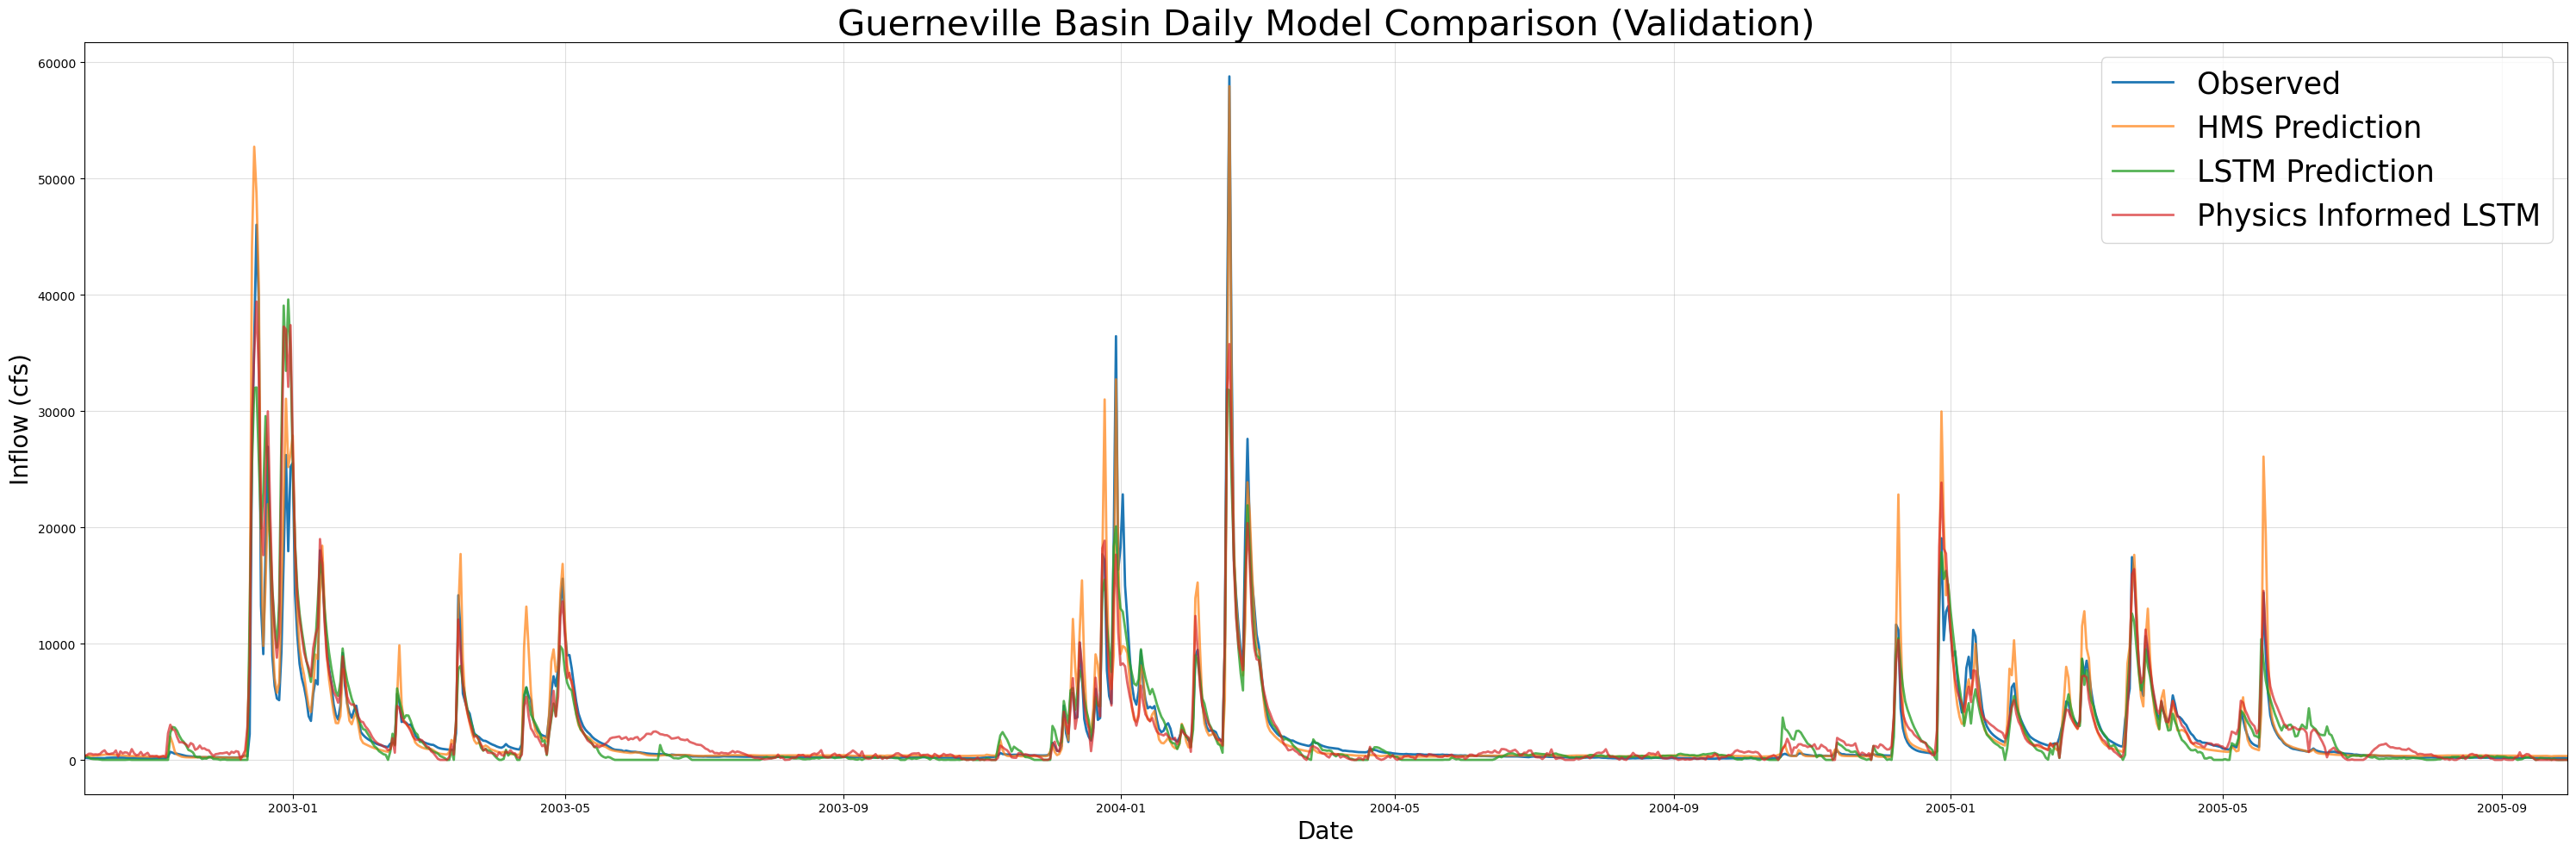

In [18]:
if not skip_best_model_validation:
    combinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Basin Daily Model Comparison (Validation)",
        fName="guerneville_daily_val_metrics.csv",
        plot_filename="guerneville_daily_val_model_comparison.png",
        timeseries_filename ="guerneville_daily_val_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("guerneville_daily_val_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Guerneville Basin Daily Model Comparison (Validation)", fName="guerneville_daily_val_metrics.csv")

In [19]:
if not skip_best_model_validation:
    fancyCombinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title='Guerneville Basin Daily Model Comparison (Validation)',
        fName="guerneville_daily_val_metrics.csv",
        timeseries_filename ="guerneville_daily_val_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(combined_df, title='Guerneville Basin Daily Model Comparison (Validation)', 
                            fName="guerneville_daily_val_metrics.csv")

In [20]:
if skip_best_model_validation:
    val_metrics = pd.read_csv("guerneville_daily_val_metrics.csv", index_col=0)
    print(val_metrics)

                      HMS          LSTM  Physics_Informed_LSTM
NSE          8.819596e-01  8.124629e-01           8.513376e-01
MSE          2.922175e+06  4.642615e+06           3.680243e+06
RMSE         1.709437e+03  2.154673e+03           1.918396e+03
KGE          8.769172e-01  8.964227e-01           8.981791e-01
Alpha-NSE    1.099694e+00  9.630109e-01           9.728464e-01
Beta-KGE     1.053142e+00  9.958348e-01           1.062620e+00
Beta-NSE     2.564937e-02 -2.010343e-03           3.022377e-02
Pearson-r    9.511483e-01  9.033423e-01           9.244426e-01
FHV          1.141926e+01 -3.368011e+00           6.856144e-01
FMS         -1.806008e+01  2.313138e+01          -1.842139e+01
FLV          7.349668e+00 -1.144362e+03          -2.533423e+03
Peak-Timing  2.000000e-01  6.000000e-01           0.000000e+00
Peak-MAPE    3.080989e+01  3.254774e+01           1.843110e+01
PBIAS       -5.314225e+00  4.165176e-01          -6.261983e+00


### Re-run testing with best hyperparameters

[UCB Trainer] Using CPU (unhandled gpu=-1).
2025-06-18 15:58:15,213: Logging to c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_1806_155815\output.log initialized.
2025-06-18 15:58:15,213: ### Folder structure created at c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_1806_155815
2025-06-18 15:58:15,214: ### Run configurations for testing_run
2025-06-18 15:58:15,215: experiment_name: testing_run
2025-06-18 15:58:15,215: train_basin_file: guerneville
2025-06-18 15:58:15,216: validation_basin_file: guerneville
2025-06-18 15:58:15,216: test_basin_file: guerneville
2025-06-18 15:58:15,217: train_start_date: 1994-10-01 00:00:00
2025-06-18 15:58:15,219: train_end_date: 2005-09-30 00:00:00
2025-06-18 15:58:15,219: validation_start_date: 2002-10-01 00:00:00
2025-06-18 15:58:15,220: validation_end_date: 2005-09-30 00:00:00
2025-06-18 15:58:15,221: test_start_da

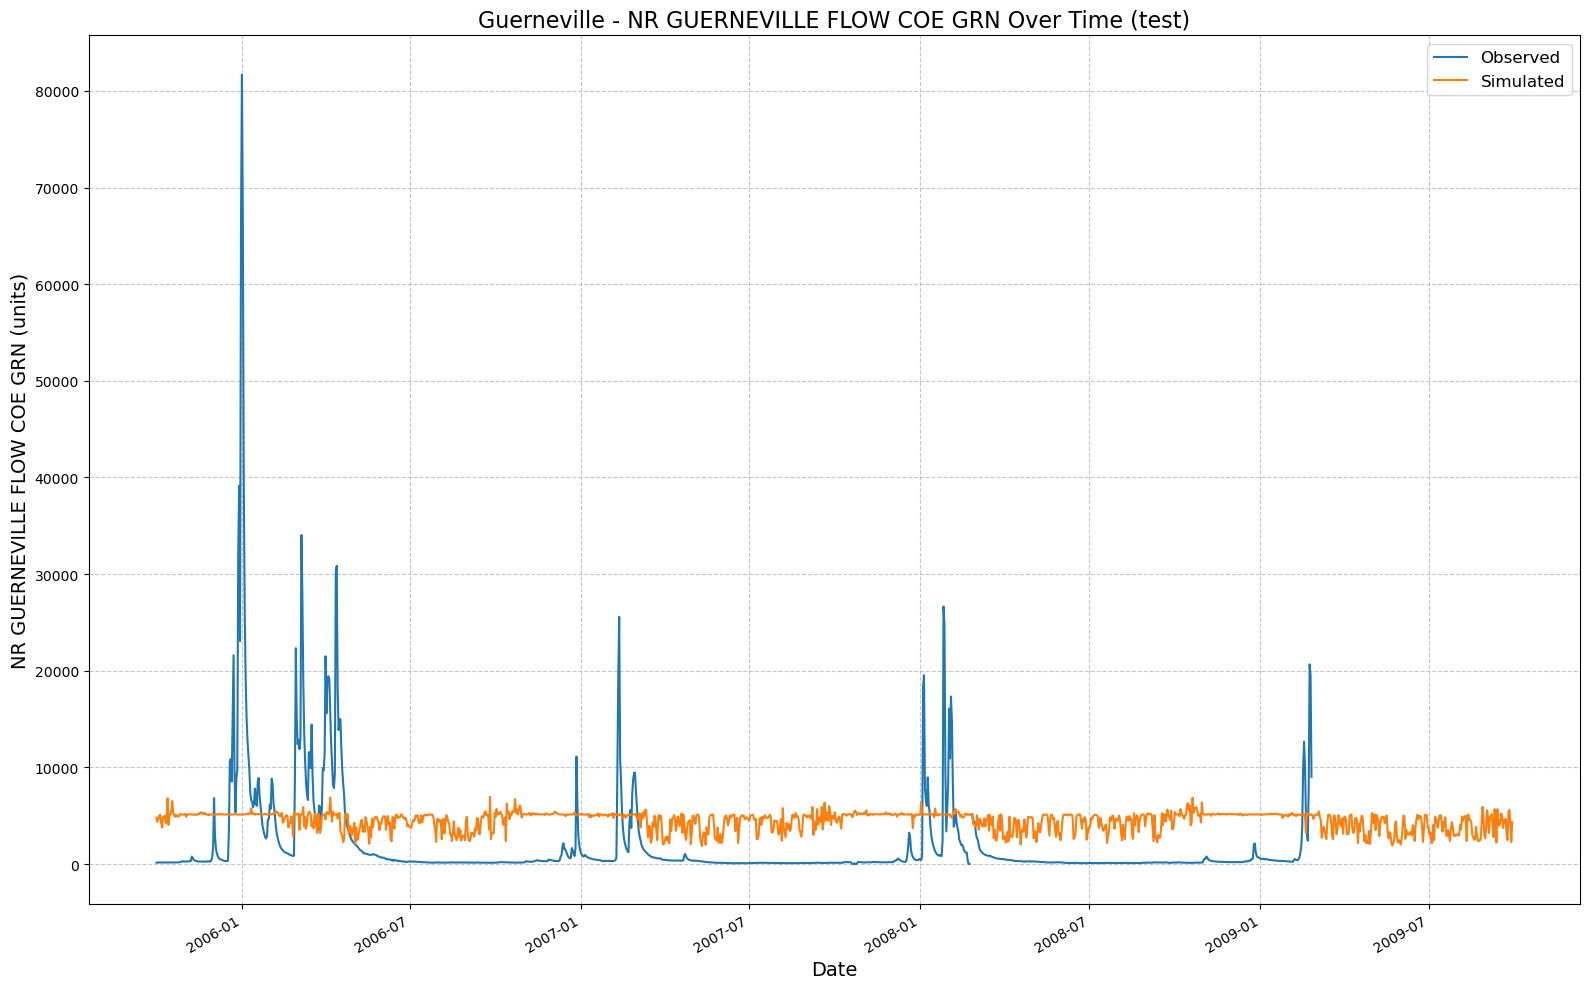

In [21]:
if not skip_best_model_test:
    lstmNoPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=True,  
        gpu=GPU_SETTING,
        num_ensemble_members = NUM_ENSEMBLES,
        verbose = verbose
    )
    
    lstmNoPhysicsExtBest.train()
    no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
    no_physics_test_metrics

[UCB Trainer] Using CPU (unhandled gpu=-1).
2025-06-18 15:58:16,900: Logging to c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_1806_155816\output.log initialized.
2025-06-18 15:58:16,901: ### Folder structure created at c:\Users\arman\Dropbox\The University\Projects\UCB-USACE-LSTMs\UCB_training\models\guerneville_all\runs\testing_run_1806_155816
2025-06-18 15:58:16,901: ### Run configurations for testing_run
2025-06-18 15:58:16,902: experiment_name: testing_run
2025-06-18 15:58:16,902: train_basin_file: guerneville
2025-06-18 15:58:16,903: validation_basin_file: guerneville
2025-06-18 15:58:16,904: test_basin_file: guerneville
2025-06-18 15:58:16,904: train_start_date: 1994-10-01 00:00:00
2025-06-18 15:58:16,905: train_end_date: 2005-09-30 00:00:00
2025-06-18 15:58:16,906: validation_start_date: 2002-10-01 00:00:00
2025-06-18 15:58:16,907: validation_end_date: 2005-09-30 00:00:00
2025-06-18 15:58:16,907: test_start_da

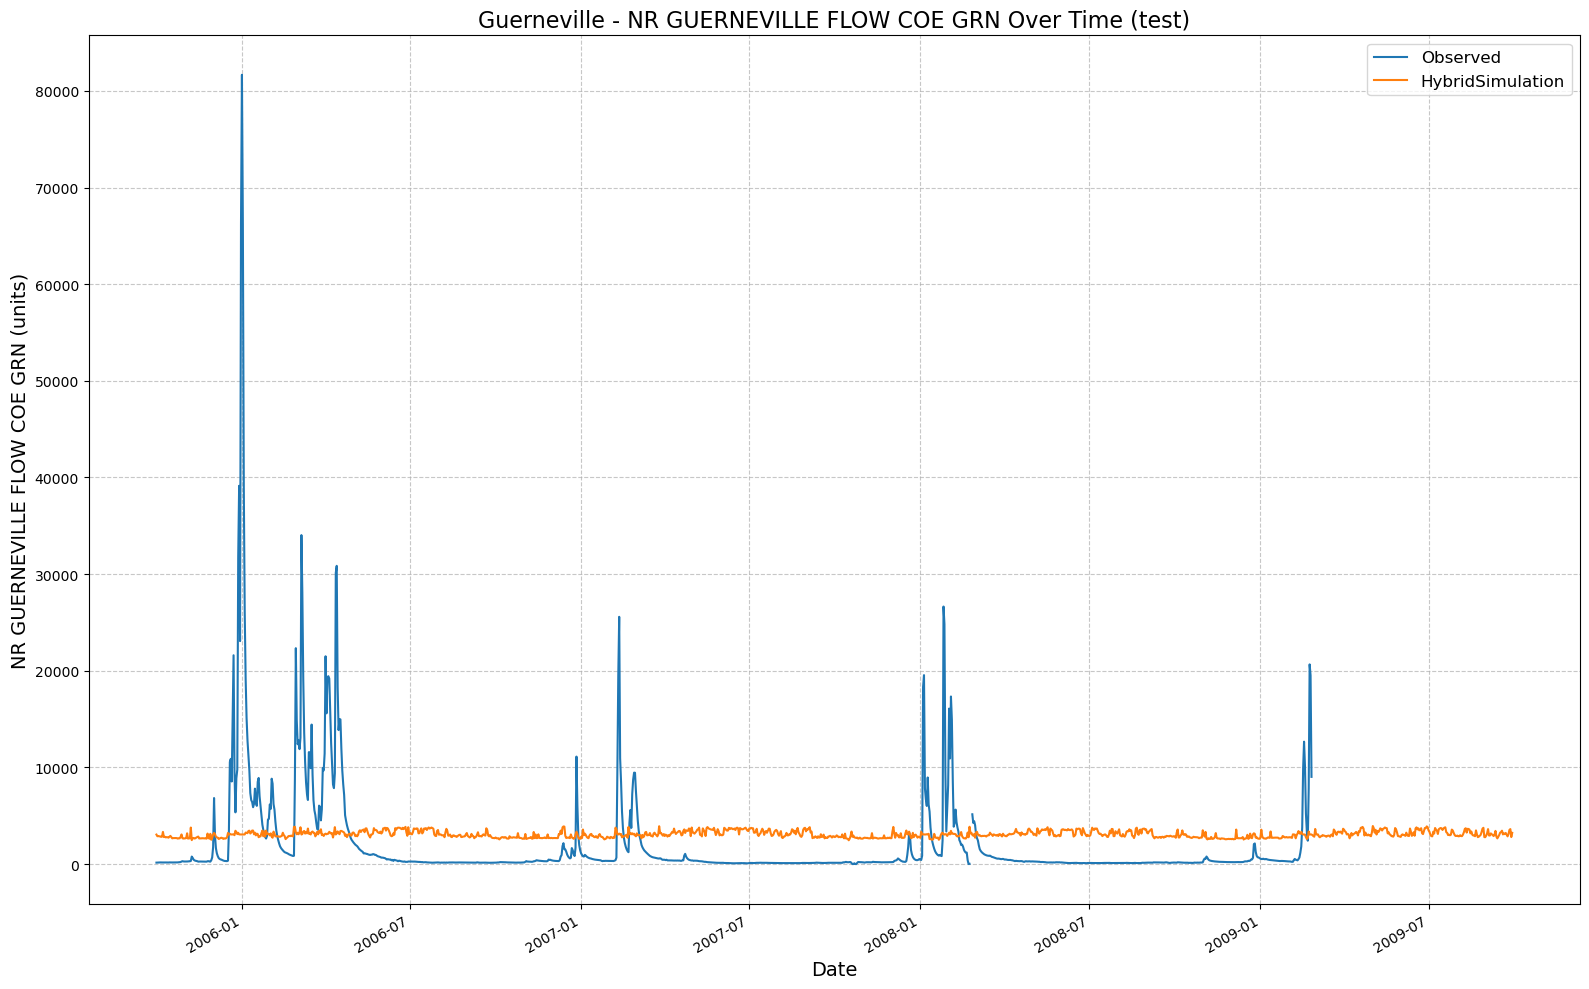

In [22]:
if not skip_best_model_test:
    lstmPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=True,
        gpu=GPU_SETTING,
        num_ensemble_members = NUM_ENSEMBLES,
        verbose = verbose
    )
    
    lstmPhysicsExtBest.train()
    physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
    physics_test_metrics

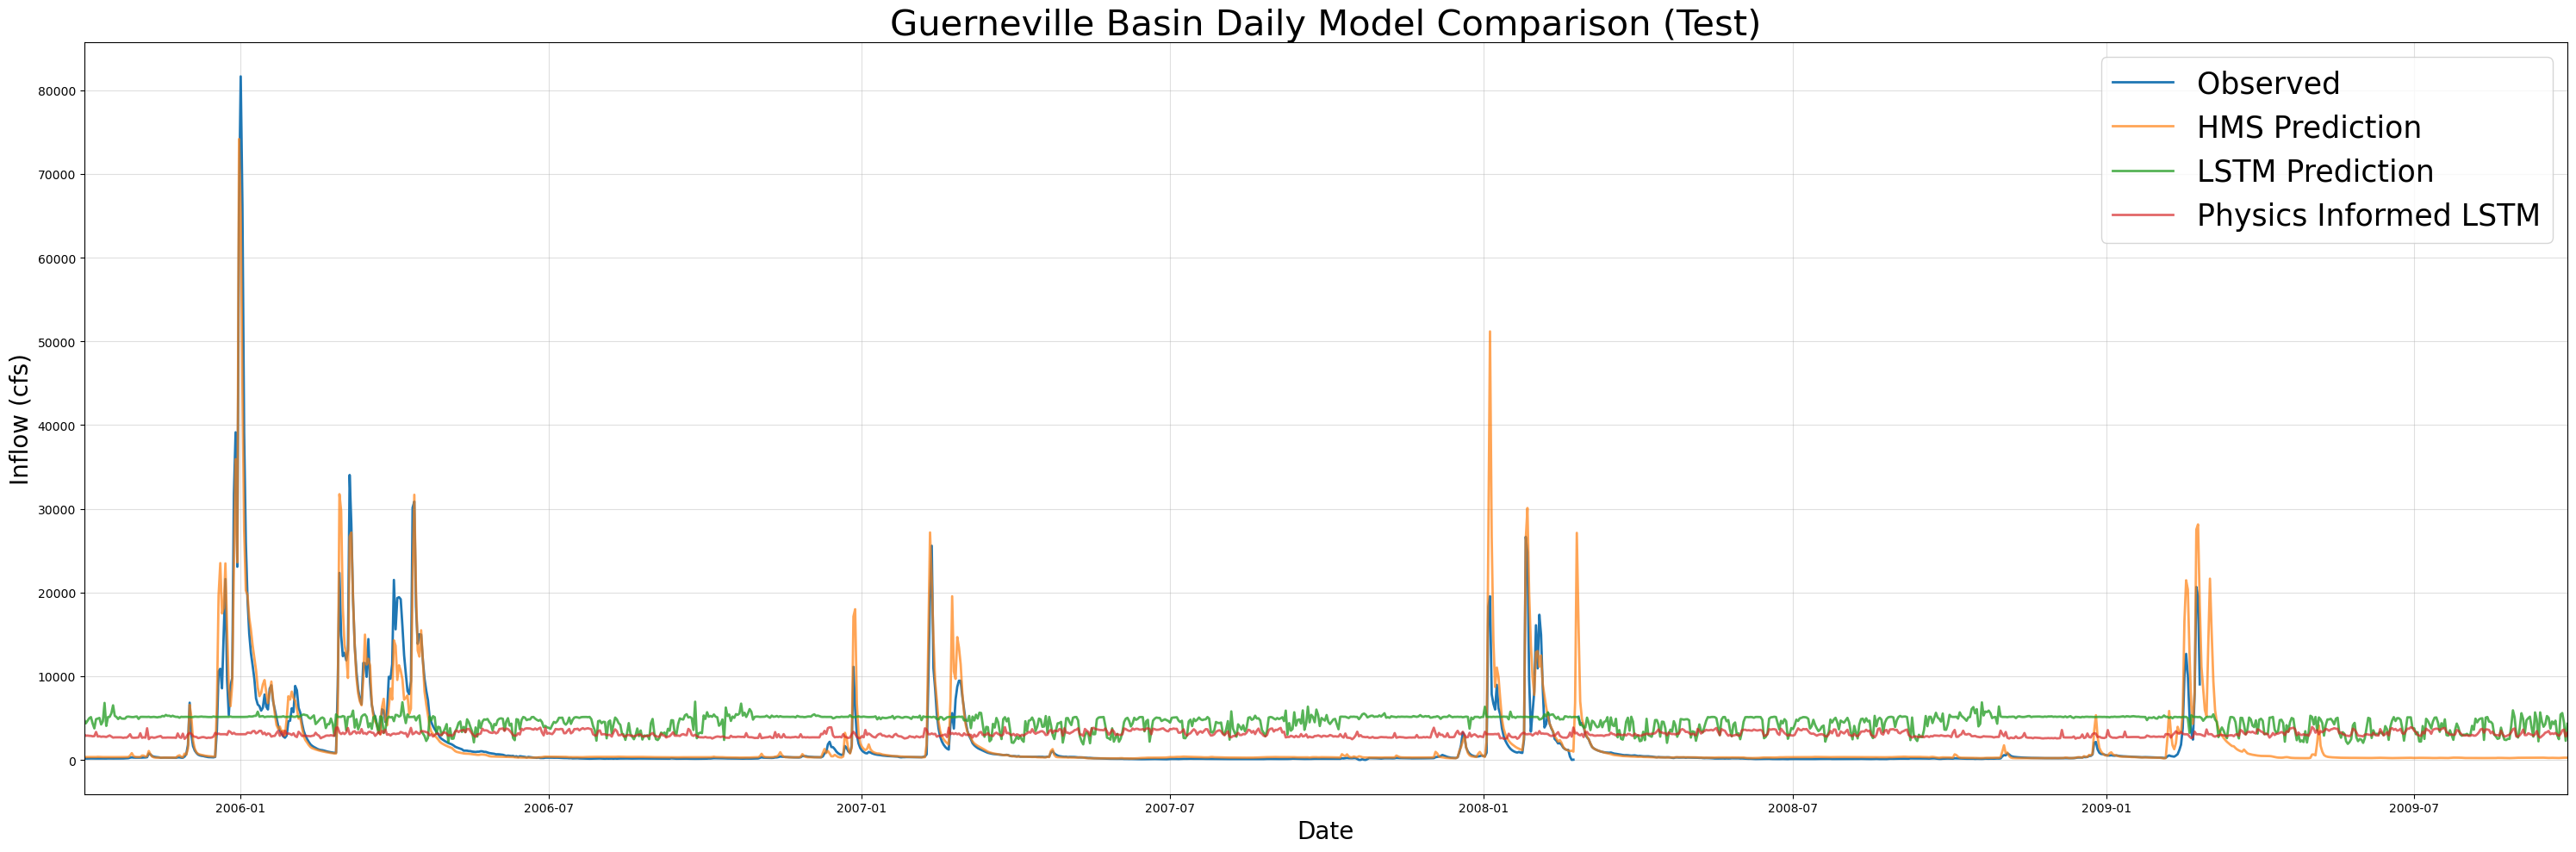

In [23]:
if not skip_best_model_test:
    combinedPlot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Basin Daily Model Comparison (Test)",
        fName="guerneville_daily_test_metrics.csv",
        plot_filename="guerneville_daily_model_comparison.png",
        timeseries_filename ="guerneville_daily_test_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("guerneville_daily_test_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Guerneville Basin Daily Model Comparison (Test)", fName="guerneville_daily_test_metrics.csv")

In [24]:
if not skip_best_model_test:
    fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Guerneville Basin Daily Model Comparison', fName = "guerneville_daily_test_metrics.csv", timeseries_filename ="guerneville_daily_test_combined_ts.csv")
else:
    fancyCombinedPlotFromDf(combined_df, title='Guerneville Basin Daily Model Comparison', fName = "guerneville_daily_test_metrics.csv")

In [25]:
test_metrics = pd.read_csv("guerneville_daily_test_metrics.csv", index_col=0)
print(test_metrics)

                      HMS          LSTM  Physics_Informed_LSTM
NSE          8.499148e-01 -2.215117e-01          -3.577997e-02
MSE          4.623214e+06  3.762735e+07           3.190609e+07
RMSE         2.150166e+03  6.134114e+03           5.648547e+03
KGE          8.430313e-01 -8.459551e-01          -4.429642e-01
Alpha-NSE    1.026757e+00  1.544065e-01           6.090480e-02
Beta-KGE     1.137092e+00  2.388021e+00           1.571209e+00
Beta-NSE     4.800381e-02  4.860245e-01           2.000127e-01
Pearson-r    9.283838e-01  1.248312e-01           6.513871e-02
FHV          2.575220e+00 -8.006245e+01          -8.770398e+01
FMS         -2.409063e+01 -9.442906e+01          -9.077684e+01
FLV          9.758516e+01  9.661314e+01           9.951670e+01
Peak-Timing  7.500000e-01  1.000000e+00           1.500000e+00
Peak-MAPE    1.465164e+01  8.257687e+01           8.946589e+01
PBIAS       -1.370924e+01 -1.388021e+02          -5.712094e+01


In [26]:
end_time = datetime.utcnow()
print("\nEnd time:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
print("Total time:", end_time - start_time)


End time: 2025-06-18 22:58:21
Total time: 0:00:21.900104


C:\Users\arman\AppData\Local\Temp\ipykernel_17220\3925244319.py:1: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
if not skip_best_model_test:
    write_paths("no_physics", lstmNoPhysicsExtBest, filename = RUNS_FILE)
    write_paths("physics", lstmPhysicsExtBest, filename = RUNS_FILE)
saved = json.loads(Path(RUNS_FILE).read_text())

In [ ]:
runner_np = UCB_trainer.from_run_dir(to_path_or_list(saved["no_physics"]), gpu=GPU_SETTING, verbose=verbose)
runner_ph = UCB_trainer.from_run_dir(to_path_or_list(saved["physics"]), gpu=GPU_SETTING, verbose=verbose)

In [ ]:
pred_np_d_train_validation, obs_np_d_train_validation, met_np_d_train_validation = runner_np.predict(period="train_validation")
met_np_d_train_validation.to_dict()

In [ ]:
pred_np_d_test, obs_np_d_test, met_np_d_test = runner_np.predict(period="test")
met_np_d_test.to_dict()

In [ ]:
pred_ph_d_train_validation, obs_ph_d_train_validation, met_ph_d_train_validation = runner_ph.predict(period="train_validation")
met_ph_d_train_validation.to_dict()

In [ ]:
pred_ph_d_test, obs_ph_d_test, met_ph_d_test = runner_ph.predict(period="test")
met_ph_d_test.to_dict()

##### Additional Plots

In [ ]:
wettest_start = "2005-10-01"
wettest_end = "2006-09-30"
dryest_start = "2008-10-01"
dryest_end = "2009-09-30"
metric_list = ["NSE", "PBIAS"]

In [ ]:
if not skip_best_model_test:
    extended_combined_plot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Daily Wettest Year Timeseries",
        start_date=wettest_start,
        end_date=wettest_end,
        metrics=metric_list,
        fName="guerneville_daily_wet_metrics.csv",
        timeseries_filename="guerneville_daily_wet_ts.csv",
        plot_filename="guerneville_daily_wet_plot.png")
else:
    extended_combined_plot_from_df(
        df=combined_df,
        title="Guerneville Daily Wettest Year Timeseries",
        start_date=wettest_start,
        end_date=wettest_end,
        metrics=metric_list,
        fName="guerneville_daily_wet_metrics.csv",
        timeseries_filename="guerneville_daily_wet_ts.csv",
        plot_filename="guerneville_daily_wet_plot.png")

In [ ]:
if not skip_best_model_test:
    extended_combined_plot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Daily Wettest Year Timeseries - Interactive",
        start_date=wettest_start,
        end_date=wettest_end,
        metrics=metric_list,
        fName="guerneville_daily_wet_metrics.csv",
        timeseries_filename="guerneville_daily_wet_ts.csv",
        plot_filename="guerneville_daily_wet_plot.png",
        interactive = True)
else:
    extended_combined_plot_from_df(
        df=combined_df,
        title="Guerneville Daily Wettest Year Timeseries - Interactive",
        start_date=wettest_start,
        end_date=wettest_end,
        metrics=metric_list,
        fName="guerneville_daily_wet_metrics.csv",
        timeseries_filename="guerneville_daily_wet_ts.csv",
        plot_filename="guerneville_daily_wet_plot.png",
        interactive = True)

In [ ]:
if not skip_best_model_test:
    extended_combined_plot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Daily Driest Year Timeseries",
        start_date=dryest_start,
        end_date=dryest_end,
        metrics=metric_list,
        fName="guerneville_daily_dry_metrics.csv",
        timeseries_filename="guerneville_daily_dry_ts.csv",
        plot_filename="guerneville_daily_dry_plot.png")
else:
    extended_combined_plot_from_df(
        df=combined_df,
        title="Guerneville Daily Driest Year Timeseries",
        start_date=dryest_start,
        end_date=dryest_end,
        metrics=metric_list,
        fName="guerneville_daily_dry_metrics.csv",
        timeseries_filename="guerneville_daily_dry_ts.csv",
        plot_filename="guerneville_daily_dry_plot.png")

In [ ]:
if not skip_best_model_test:
    extended_combined_plot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title="Guerneville Daily Driest Year Timeseries - Interactive",
        start_date=dryest_start,
        end_date=dryest_end,
        metrics=metric_list,
        fName="guerneville_daily_dry_metrics.csv",
        timeseries_filename="guerneville_daily_dry_ts.csv",
        plot_filename="guerneville_daily_dry_plot.png",
        interactive = True)
else:
    extended_combined_plot_from_df(
        df=combined_df,
        title="Guerneville Daily Driest Year Timeseries - Interactive",
        start_date=dryest_start,
        end_date=dryest_end,
        metrics=metric_list,
        fName="guerneville_daily_dry_metrics.csv",
        timeseries_filename="guerneville_daily_dry_ts.csv",
        plot_filename="guerneville_daily_dry_plot.png",
        interactive = True)